# Dimension Reduce Cancer



In [53]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import random_projection
from cluster_func import em
from cluster_func import kmeans

In [54]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
# clean out '?' values
X = np.nan_to_num(X)
y = data.target

#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Starting FA
Dimensionality reduction
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [5.36580187e-02 9.90717922e-01 9.64907320e-01 9.99964530e-01
 1.62405073e-04 1.31595314e-03 2.46887802e-03 3.40673967e-04
 6.24877244e-04 3.91346926e-05 5.93903985e-03 1.87668840e-01
 2.92284284e-01 9.98474300e-01 7.21835617e-06 2.39037010e-04
 7.70679116e-04 2.54887041e-05 5.58564501e-05 6.19405709e-06
 1.41721606e-01 9.90542607e-01 9.88050686e-01 9.99957099e-01
 4.04469805e-04 1.18571269e-02 2.11294493e-02 1.09852535e-03
 2.80165455e-03 2.42114799e-04]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not 

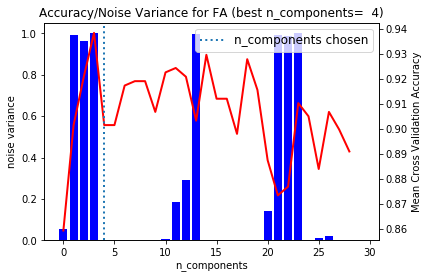

In [55]:
#######################################################################################################################
#######################################################################################################################
# Dimensionality reduction PCA


print("Starting FA")
print("Dimensionality reduction")

decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_split = 5)
fa = FactorAnalysis(max_iter = 100)

pipe = Pipeline(steps=[('fa', fa), ('decisionTree', decisiontree)])

# Plot the PCA spectrum
fa.fit(X)

fig, ax = plt.subplots()
print(list(range(1,X.shape[1])),fa.noise_variance_)
#ax.bar(list(range(1,X.shape[1]+1,int((X.shape[1]+1)/10))), fa.noise_variance_, linewidth=2, color = 'blue')
#ax.bar(list(range(1,X.shape[1])), fa.noise_variance_, linewidth=2, color = 'blue')
ax.bar(np.arange(X.shape[1]), fa.noise_variance_, linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('noise variance')

#Checking the accuracy for taking all combination of components
n_components = range(1, X.shape[1])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(fa__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_
ax1 = ax.twinx()

#Plotting the accuracies and best component
ax1.plot(results['mean_test_score'], linewidth = 2, color = 'red')
ax1.set_ylabel('Mean Cross Validation Accuracy')
ax1.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('Accuracy/Noise Variance for FA (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['fa'].n_components )
plt.show()

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X_train)
X_train_transformed = fa_new.transform(X_train)
X_test_transformed = fa_new.transform(X_test)

Calculating Reconstruction Error


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\factor_analysis.py:228: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


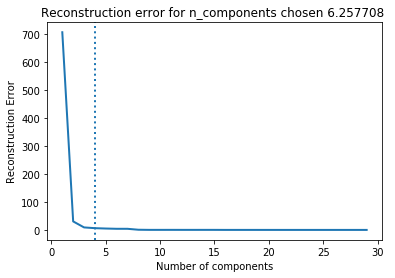

In [56]:
###############################################################################################################################
#Reconstruction Error

print("Calculating Reconstruction Error")

def inverse_transform_fa(fa, X_transformed, X_train):

	return X_transformed.dot(fa.components_) + np.mean(X_train, axis = 0)

reconstruction_error = []

for comp in n_components:

	fa = FactorAnalysis(n_components = comp, max_iter = 100)
	X_transformed = fa.fit_transform(X_train)
	X_projected = inverse_transform_fa(fa, X_transformed, X_train)
	reconstruction_error.append(((X_train - X_projected) ** 2).mean())

	if(comp == gridSearch.best_estimator_.named_steps['fa'].n_components):
		chosen_error = ((X_train - X_projected) ** 2).mean()

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
ax2.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
plt.show()

Clustering FA
Expected Maximization
Training accuracy for Expected Maximization for K = 2:  86.37362637362638
Testing accuracy for Expected Maximization for K = 2:  89.47368421052632
KMeans


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Training accuracy for KMeans for K = 2:  91.42857142857143
Testing accuracy for KMeans for K = 2:  90.35087719298247


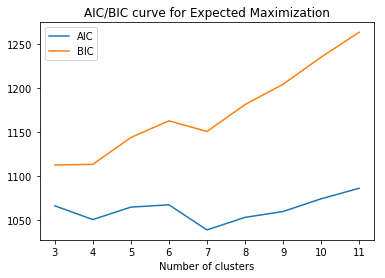

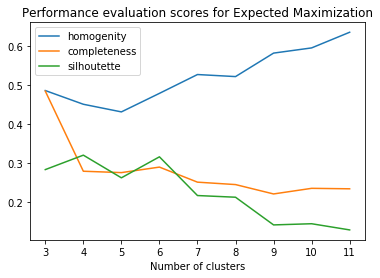

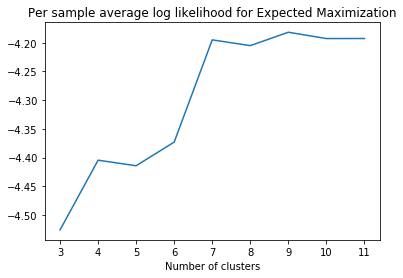

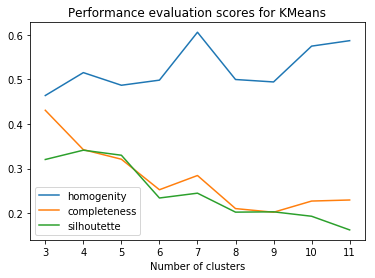

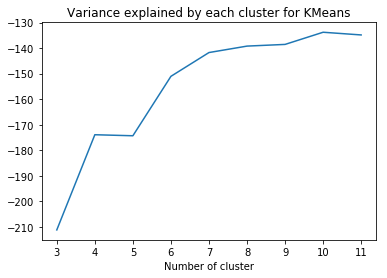

In [58]:
################################################################################################################################
#Clustering after dimensionality reduction

print("Clustering FA")

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X)
X_transformed = fa_new.transform(X)


means_init = np.array([X_transformed[y == i].mean(axis=0) for i in range(2)])

#clustering experiments
print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 0)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 0)



In [59]:
#Writing data to file
component_list = np.array(component_list).reshape(-1,1)
array_aic = np.array(array_aic).reshape(-1,1)
array_bic = np.array(array_bic).reshape(-1,1)
array_homo_1 = np.array(array_homo_1).reshape(-1,1)
array_comp_1 = np.array(array_comp_1).reshape(-1,1)
array_sil_1 = np.array(array_sil_1).reshape(-1,1)
array_avg_log = np.array(array_avg_log).reshape(-1,1)
array_homo_2 = np.array(array_homo_2).reshape(-1,1)
array_comp_2 = np.array(array_comp_2).reshape(-1,1)
array_sil_2 = np.array(array_sil_2).reshape(-1,1)
array_var = np.array(array_var).reshape(-1,1)

reconstruction_error = np.array(reconstruction_error).reshape(-1,1)

data_em_fa_cancer = np.concatenate((component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log), axis =1)

data_km_fa_cancer = np.concatenate((component_list, array_homo_2, array_sil_2, array_var), axis =1)

reconstruction_error_fa_cancer = np.concatenate((np.arange(1,X.shape[1]).reshape(-1,1), reconstruction_error), axis = 1)

file = './data/data_em_fa_cancer.csv'
with open(file, 'w', newline = '') as output:
	writer = csv.writer(output, delimiter=',')
	writer.writerows(data_em_fa_cancer)

file = './data/data_km_fa_cancer.csv'
with open(file, 'w', newline = '') as output:
	writer = csv.writer(output, delimiter=',')
	writer.writerows(data_km_fa_cancer)

file = './data/reconstruction_error_fa_cancer.csv'
with open(file, 'w', newline = '') as output:
	writer = csv.writer(output, delimiter=',')
	writer.writerows(reconstruction_error_fa_cancer)